In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

/Users/edilbekabdyrakhmanov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Load your pickle data
subdirectory = "/Users/edilbekabdyrakhmanov/Documents/GitHub/bakeryy/3_Model/Neural_Net_Edilbek/final_data"
training_features = pd.read_pickle(f"{subdirectory}/training_features.pkl")
validation_features = pd.read_pickle(f"{subdirectory}/validation_features.pkl")
test_features = pd.read_pickle(f"{subdirectory}/test_features.pkl")
training_labels = pd.read_pickle(f"{subdirectory}/training_labels.pkl")
validation_labels = pd.read_pickle(f"{subdirectory}/validation_labels.pkl")
test_labels = pd.read_pickle(f"{subdirectory}/test_labels.pkl")

# Drop 'Datum' column if present
for feature_set in [training_features, validation_features, test_features]:
    if 'Datum' in feature_set.columns:
        feature_set.drop('Datum', axis=1, inplace=True)

In [4]:
# Improved neural net architecture
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 224 (896.00 B)

In [5]:
# Compile & train with EarlyStopping
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    training_features, training_labels,
    epochs=200,
    validation_data=(validation_features, validation_labels),
    callbacks=[early_stop]
)

# Save the improved model
model.save("improved_python_model1.h5")


Epoch 1/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 56704.2656 - val_loss: 48240.0273
Epoch 2/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 51227.1836 - val_loss: 39224.3477
Epoch 3/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 43972.3750 - val_loss: 32789.2422
Epoch 4/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 36312.8789 - val_loss: 22903.7129
Epoch 5/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 27556.6016 - val_loss: 17262.3145
Epoch 6/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 21140.7012 - val_loss: 10589.8525
Epoch 7/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 14182.4053 - val_loss: 8347.1865
Epoch 8/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 11568.0625 - val_loss: 6156.6460
Epoch 9/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 7223.2603 - val_loss: 3667.1604
Epoch 10/200
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 7027.4297 - val_loss: 3516.4370
Epoch 11/200
276/276 ━━━━━━━━━━━━━━━━

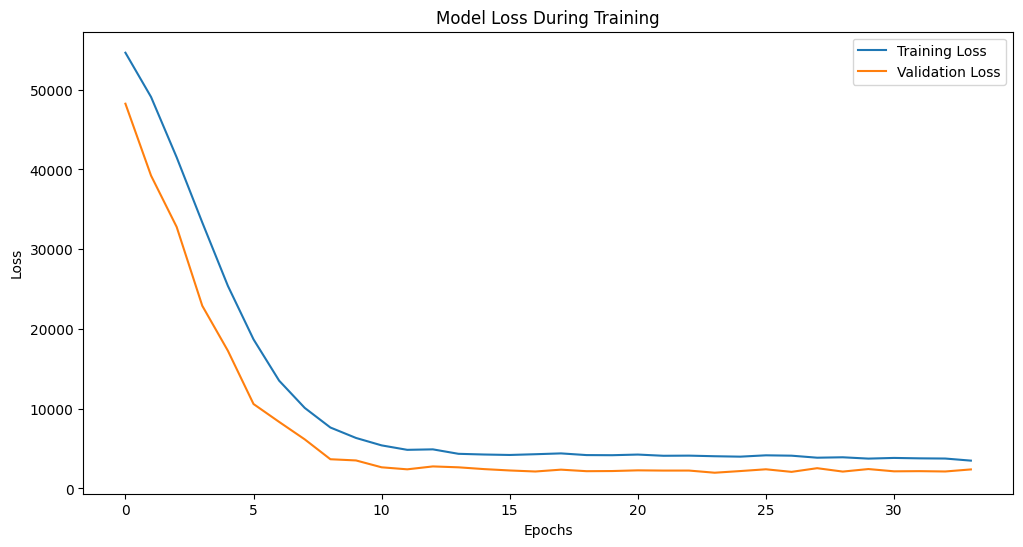

In [6]:
# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Robust MAPE function
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = (y_true != 0) & (~np.isnan(y_true)) & (~np.isnan(y_pred))
    if np.sum(non_zero_mask) == 0:
        return np.nan
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Predictions
train_preds = model.predict(training_features).flatten()
val_preds = model.predict(validation_features).flatten()

# Compute MAPE
train_mape = mape(training_labels.values.flatten(), train_preds)
val_mape = mape(validation_labels.values.flatten(), val_preds)

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Validation MAPE: {val_mape:.2f}%")


276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
Training MAPE: 18.00%
Validation MAPE: 18.80%


In [8]:
# Assuming:
# validation_features is your DataFrame with one-hot Warengruppe columns
# validation_labels are your true Umsatz values
# val_preds are your predictions from the model

# Build a DataFrame to merge everything
val_results = validation_features.copy()
val_results['Umsatz_true'] = validation_labels.values
val_results['Umsatz_pred'] = val_preds

# Extract the list of Warengruppe columns
warengruppe_cols = [col for col in val_results.columns if col.startswith('Warengruppe_')]

# For each Warengruppe, compute MAPE
for col in warengruppe_cols:
    group_mask = val_results[col] == 1
    if group_mask.sum() > 0:
        group_true = val_results.loc[group_mask, 'Umsatz_true']
        group_pred = val_results.loc[group_mask, 'Umsatz_pred']
        group_mape = mape(group_true, group_pred)
        print(f"{col} Validation MAPE: {group_mape:.2f}%")
    else:
        print(f"{col} has no samples in validation set.")


Warengruppe_Brötchen Validation MAPE: 14.81%
Warengruppe_Croissant Validation MAPE: 18.90%
Warengruppe_Konditorei Validation MAPE: 21.99%
Warengruppe_Kuchen Validation MAPE: 13.34%
Warengruppe_Saisonbrot Validation MAPE: 43.34%


In [9]:
from sklearn.metrics import r2_score

# Compute R^2
train_r2 = r2_score(training_labels.values.flatten(), train_preds)
val_r2 = r2_score(validation_labels.values.flatten(), val_preds)

print(f"Training R^2: {train_r2:.4f}")
print(f"Validation R^2: {val_r2:.4f}")


Training R^2: 0.9097
Validation R^2: 0.8979
